In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



##  Step 1: Data Collection




In [69]:

# Load dataset
file_path = "/content/shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert categorical columns to lowercase to avoid inconsistencies
df.columns = df.columns.str.lower().str.replace(" ", "_")



   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

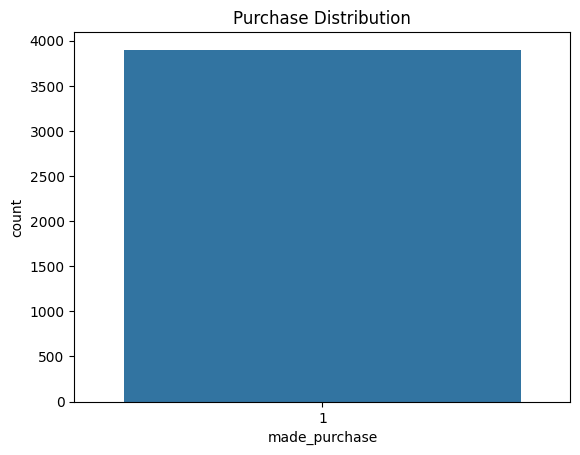

In [70]:
## Step 2: Feature Engineering
# Creating a binary target column: 1 if purchase amount > 0, else 0
df['made_purchase'] = df['purchase_amount_(usd)'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns that do not contribute to prediction
df = df.drop(columns=['customer_id', 'promo_code_used'])

# Check the distribution of target variable
sns.countplot(x=df['made_purchase'])
plt.title("Purchase Distribution")
plt.show()


## EDA

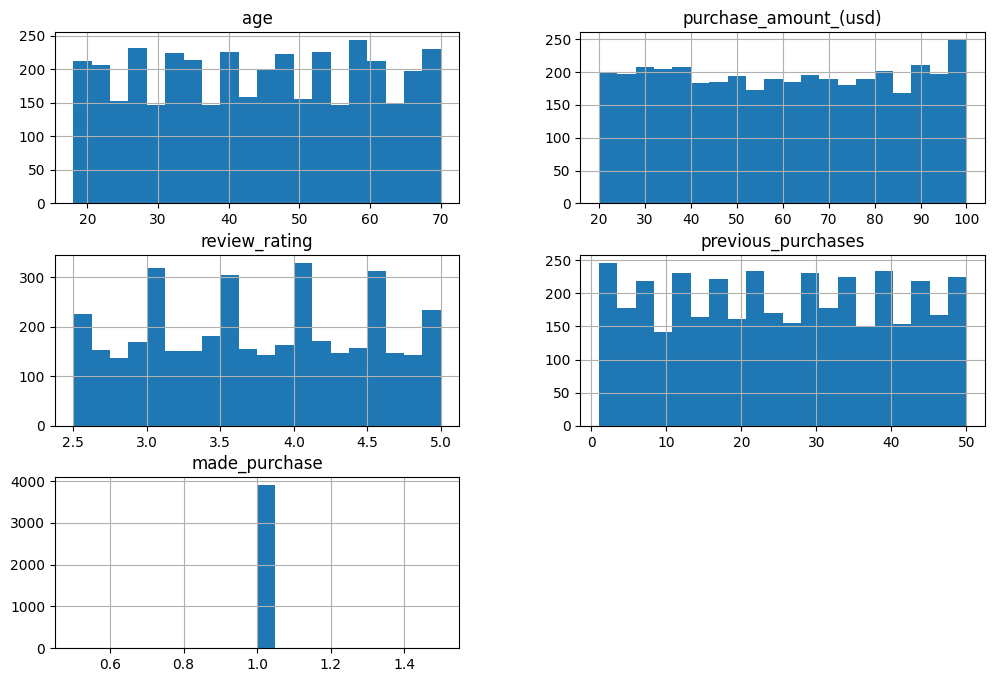

In [72]:
# Visualizing numeric feature distributions
df.hist(figsize=(12, 8), bins=20)
plt.show()


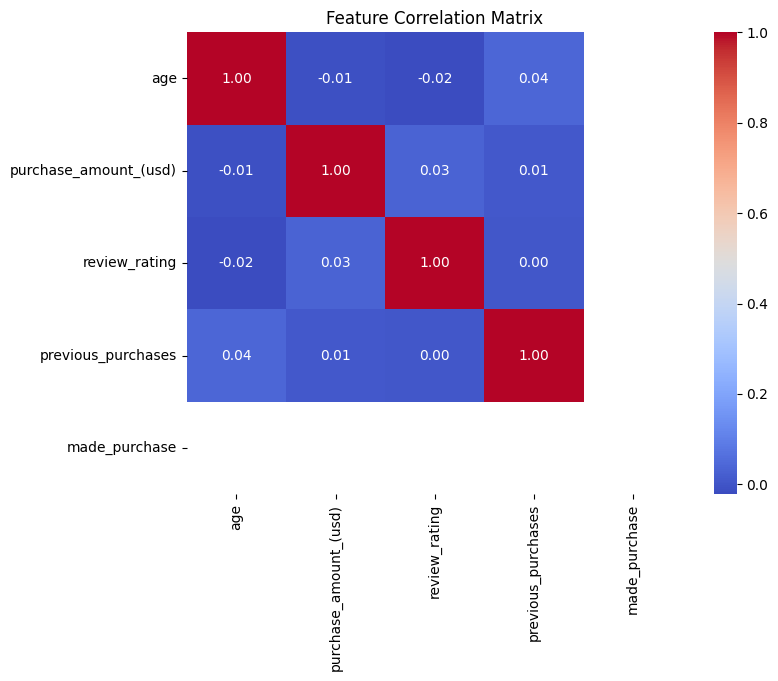

In [73]:
# Compute correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()



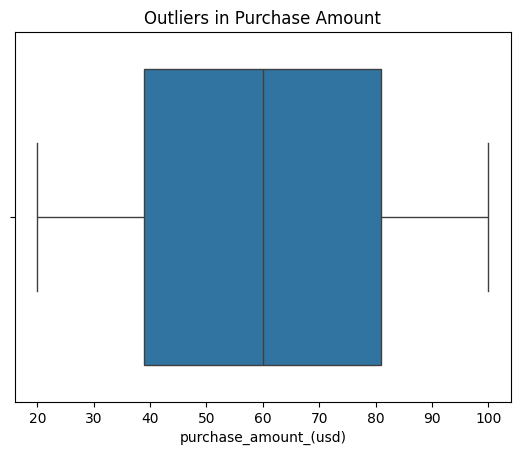

In [74]:
# Boxplot to check outliers
sns.boxplot(x=df['purchase_amount_(usd)'])
plt.title("Outliers in Purchase Amount")
plt.show()

##  Data Preprocessing

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
categorical_cols = ['gender', 'item_purchased', 'category', 'location', 'size', 'color',
                    'season', 'subscription_status', 'shipping_type', 'payment_method', 'frequency_of_purchases']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical columns
scaler = StandardScaler()
df[['purchase_amount_(usd)', 'previous_purchases']] = scaler.fit_transform(df[['purchase_amount_(usd)', 'previous_purchases']])

# Define features and target variable
X = df.drop(columns=['made_purchase'])
y = df['made_purchase']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection & Training

In [76]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [77]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure both train and test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       780

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


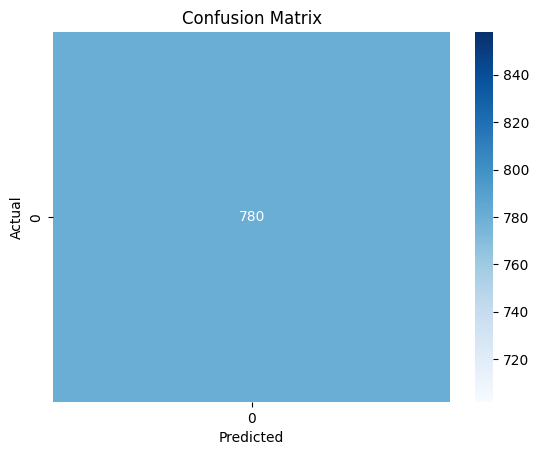

In [78]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
